In [1]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)

0.8.8
0.3.8


# Step1. 검증용 데이터셋 준비

In [2]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [3]:
image_urls = [
    'https://images.unsplash.com/photo-1580428354768-03a028646bc8?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1887&q=80',
    'https://images.unsplash.com/photo-1554497342-902a4f8da8ed?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80',
    'https://images.unsplash.com/photo-1570822827176-d965104c7eb0?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=436&q=80',
    'https://images.unsplash.com/photo-1549633030-89d0743bad01?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=580&q=80',
    'https://images.unsplash.com/photo-1485115905815-74a5c9fda2f5?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=418&q=80',
    'https://images.unsplash.com/photo-1494236656430-f512d687ca18?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=410&q=80',
    'https://images.unsplash.com/photo-1583824187027-e27ae4bbb091?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=388&q=80',
    'https://images.unsplash.com/photo-1592496000931-e50d83df1286?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1212&q=80',
    'https://images.unsplash.com/photo-1613963922671-8191198dd488?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1255&q=80',
    'https://images.unsplash.com/photo-1495106245177-55dc6f43e83f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTY3fHx0ZXh0fGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60'    
    ]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

# Step2. keras-ocr

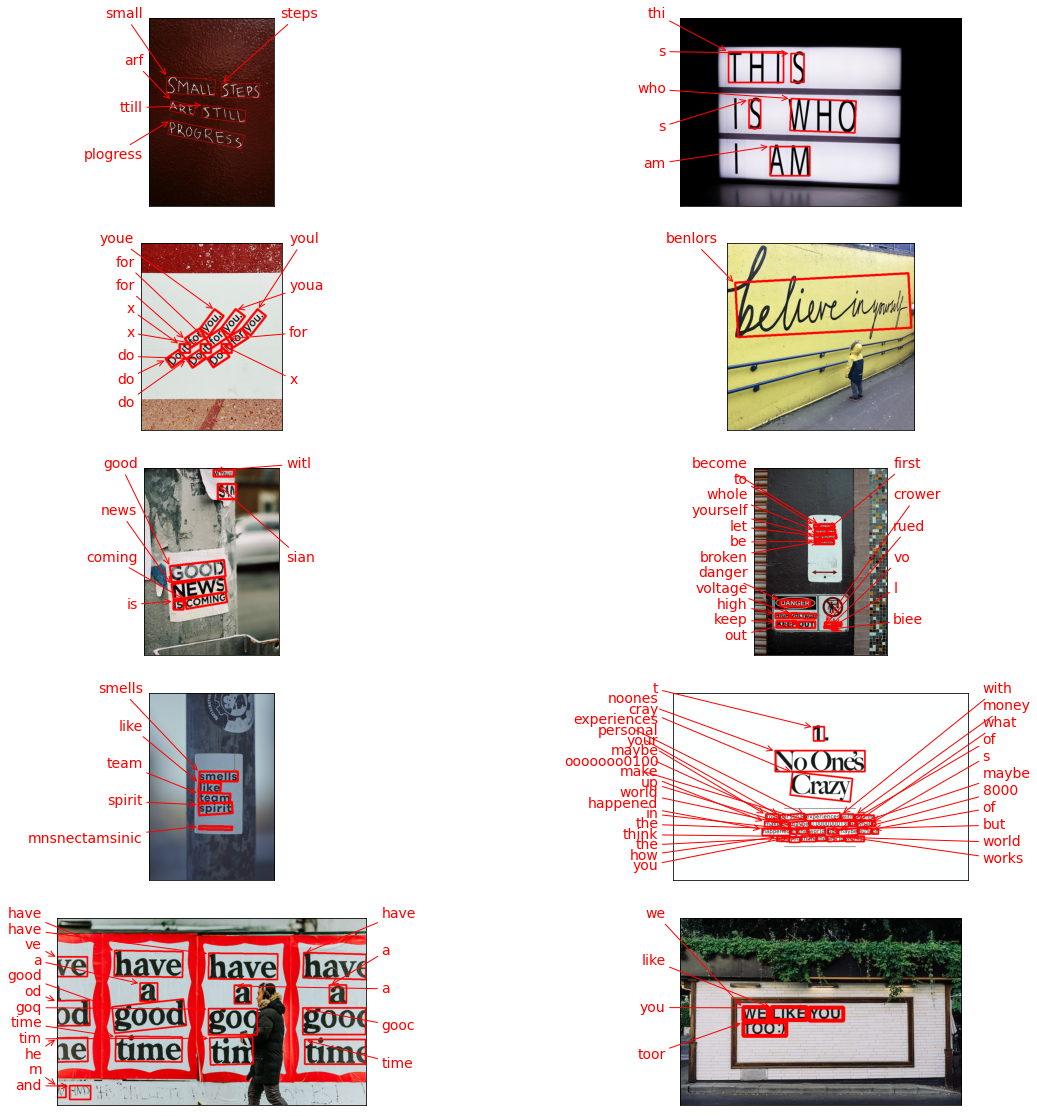

In [5]:
import matplotlib.pyplot as plt

# Plot the predictions
fig, axs = plt.subplots(nrows=round(len(images)/2),ncols=2, figsize=(20, 20))

x=0
for i in range(5):
     for j in range(2):
        keras_ocr.tools.drawAnnotations(image=images[x], 
                                    predictions=prediction_groups[x][0], ax=axs[i][j])
        x+=1


# Step3. Tesseract 

In [8]:
import requests

base_url=os.getenv('HOME')+'/aiffel/ocr_python'
for i,url in enumerate(image_urls):
    data = requests.get(url, timeout=30)
    with open(base_url+'/0{}.png'.format(i), 'wb') as file:
        file.write(data.content)


In [9]:
import os
from PIL import Image
from pytesseract import Output

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

cropped_image_path_2D_list=[]
for i in range(10):
    work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
    img_file_path = os.getenv('HOME')+'/aiffel/ocr_python/0{}.png'.format(i)
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir+'/0{}'.format(i))
    cropped_image_path_2D_list.append(cropped_image_path_list)

/aiffel/aiffel/ocr_python/00/0000.png
/aiffel/aiffel/ocr_python/01/0000.png
/aiffel/aiffel/ocr_python/02/0000.png
/aiffel/aiffel/ocr_python/02/0001.png
/aiffel/aiffel/ocr_python/03/0000.png
/aiffel/aiffel/ocr_python/04/0000.png
/aiffel/aiffel/ocr_python/05/0000.png
/aiffel/aiffel/ocr_python/05/0001.png
/aiffel/aiffel/ocr_python/05/0002.png
/aiffel/aiffel/ocr_python/05/0003.png
/aiffel/aiffel/ocr_python/05/0004.png
/aiffel/aiffel/ocr_python/05/0005.png
/aiffel/aiffel/ocr_python/05/0006.png
/aiffel/aiffel/ocr_python/05/0007.png
/aiffel/aiffel/ocr_python/05/0008.png
/aiffel/aiffel/ocr_python/05/0009.png
/aiffel/aiffel/ocr_python/05/0010.png
/aiffel/aiffel/ocr_python/05/0011.png
/aiffel/aiffel/ocr_python/05/0012.png
/aiffel/aiffel/ocr_python/05/0013.png
/aiffel/aiffel/ocr_python/05/0014.png
/aiffel/aiffel/ocr_python/05/0015.png
/aiffel/aiffel/ocr_python/06/0000.png
/aiffel/aiffel/ocr_python/07/0000.png
/aiffel/aiffel/ocr_python/07/0001.png
/aiffel/aiffel/ocr_python/07/0002.png
/aiffel/aiff

In [10]:
def recognize_images(cropped_image_path_2D_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    image_text_list=[]
    for cropped_image_path_list in cropped_image_path_2D_list:
        image_text=[]
        for image_path in cropped_image_path_list:
            image = Image.open(image_path)
            recognized_data = pytesseract.image_to_string(
                image, lang='eng',    # 한국어라면 lang='kor'
                config=custom_oem_psm_config,
                output_type=Output.DICT
            )
            image_text.append(recognized_data['text'])
        image_text_list.append(image_text)
    return image_text_list

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
image_text = recognize_images(cropped_image_path_2D_list)

In [11]:
image_text

[['\x0c'],
 ['1S 1\n\x0c'],
 ['\x0c', '\x0c'],
 ['be\n\x0c'],
 ['\x0c'],
 ['al\n\x0c',
  '——\n\x0c',
  '\x0c',
  'r\n\x0c',
  'Fecome\n\x0c',
  '@\n\x0c',
  'Pirst\n\x0c',
  'el\n\x0c',
  'yourself\n\x0c',
  'he\n\x0c',
  'arowmen\n\x0c',
  'niGH\n\x0c',
  'VOLTAGE\n\x0c',
  'AEEP\n\x0c',
  'OUT\n\x0c',
  'i.\n\x0c'],
 [':\n\x0c'],
 ['1.\n\x0c',
  'No\n\x0c',
  '( nes\n\x0c',
  'Crazy\n\x0c',
  'Your\n\x0c',
  'personal\n\x0c',
  'experiences\n\x0c',
  'with\n\x0c',
  'One y\n\x0c',
  'make\n\x0c',
  'U\n\x0c',
  'maybe\n\x0c',
  '0) OOOOO001%\n\x0c',
  'of\n\x0c',
  "what's\n\x0c",
  'nappened\n\x0c',
  'in\n\x0c',
  'the\n\x0c',
  'world.\n\x0c',
  'Nut\n\x0c',
  'maybe\n\x0c',
  'R()%\n\x0c',
  'Of\n\x0c',
  'NOW\n\x0c',
  'YOu\n\x0c',
  'tnink\n\x0c',
  'tne\n\x0c',
  'world\n\x0c',
  'WOrkKS.\n\x0c'],
 ['—\n\x0c',
  'lcci.\n\x0c',
  '>»\n\x0c',
  '\x0c',
  '7)\n\x0c',
  'Ve\n\x0c',
  'have\n\x0c',
  'nee\n\x0c',
  'have\n\x0c',
  '\x0c'],
 ['\x0c', 'eo = : i\n\x0c']]

# Step3. 테스트 결과 정리

- 첫번째 사진
    
    - keras ocr
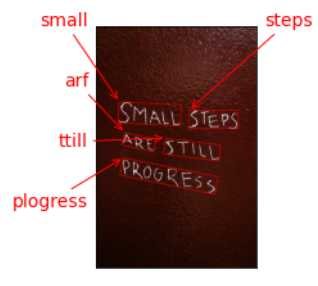

    - tesseract

---

- 두 번째 사진

    - keras ocr
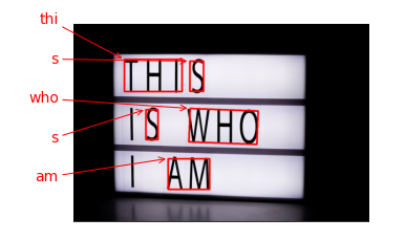


    - tesseract

1S 1

---

- 세 번째 사진

    - keras ocr
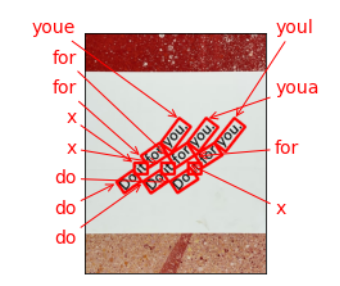

    - tesseract

---

- 네 번째 사진

    - keras ocr
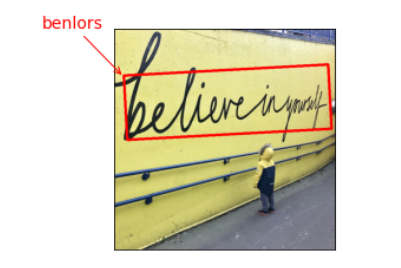

    - tesseract

be

---

- 다섯번째 사진

    - keras ocr
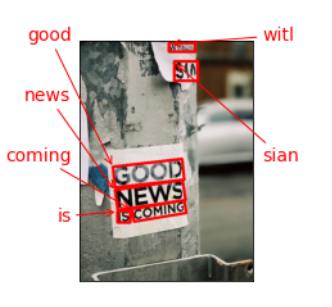


    - tesseract

---

- 여섯번째 사진

    - keras ocr
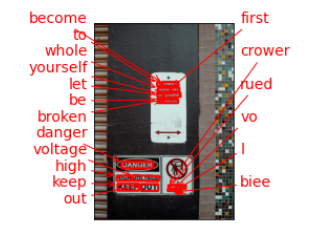

    - tesseract

lcci, 7, Ve, have, nee, have

---

- 일곱번째 사진

    - keras ocr
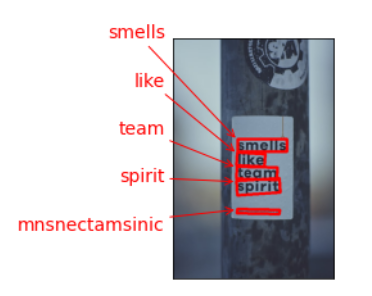

    - tesseract

:

---

- 8번째 사진

    - keras ocr
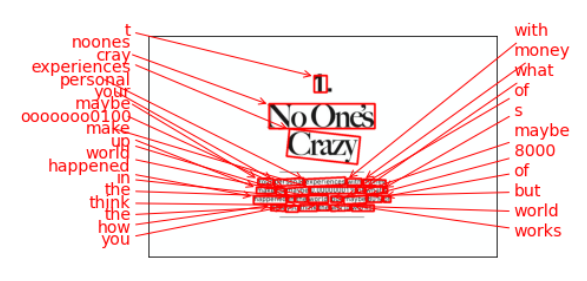


    - tesseract

1, No, ( nes, Crazy, Your, personal, experiences, with, One y,\
 make, U, maybe, 0) OOOOO001, of, what, nappened, in,the, world, Nut,maybe, R(), Of, NO, YOu, tnink, tne, world, WOrkKS

---

- 9번째 사진

    - keras ocr
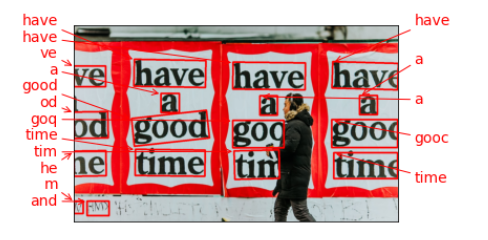

    - tesseract

al, r, Fecome, @, Pirst, el, yourself, he, arowmen, niGH, VOLTAGE, AEEP, OUT, i.

---

- 10번째 사진

    - keras ocr
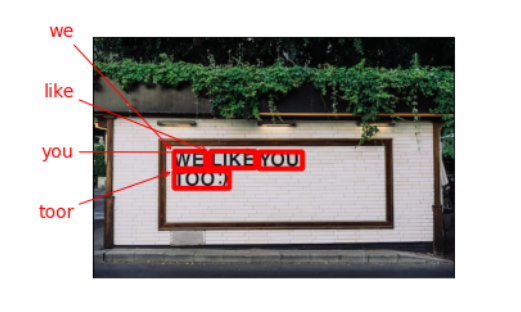

    - tesseract

eo = : i

# Step4. 결과 분석과 결론 제시

- 크기별 인식

대체적으로 글자의 크기에 구애받지 않고 인식이 잘 이뤄지는 것을 볼 수 있습니다.\
8번째 사진을 보면 알 수 있는데 숫자 1을 문자 t라고 잘 못 인식한 것 말고는 육안으로 확인이 안되는 글자마저 detection해서 인식하는 것을 볼 수 있습니다. 하지만 두번 째 사진과 같이 글자들이 적당한 크기로 있기는 하지만 띄어쓰기 공간이 넓어서 Keras에서는 this를 thi와 s 따로 따로 인식하게 됐고, tesseract에서는 this에서 is만 인식되어 1 S로 결과가 도출되었습니다.

첫번째 사진에서 tesseract는 아에 인식을 못했고 keras 에서는 prograss를 plogress라고 인식하는 등 지금의 모델은 크기가 너무 크면 또 문제가 생길 수 있겠지만 사진 프레임을 벗어나지 않는 선에서 크기보다는 글자가 명확하게 씌여져 있는지, 띄어쓰기라고 인식되지 않을 정도로 글자들이 가까운 지에 영향을 많이 받는 것 같습니다. 그래도 따져보자면 크기면에서는 keras가 더 인식을 잘하는 것 같습니다.

- 글자 배치

일곱번째 사진처럼 한줄에 한단어씩 열방향으로 나열되어 있거나, 세번째 사진 처럼 단어들이 둥그렇게 나열되어 있어도 잘 인식되는 것을 볼 수 있습니다. 사용한 모델 특성상 띄어쓰기라고 인식되지 않을 정도로 가까이에서 이어질 시 배치는 크게 영향을 받지 않는 것 같았습니다.\
하지만 tesseract의 성능은 별로 좋지 않았습니다.

- 글자 모양

4번째 사진을 보면 글자가 필기체로 쓰여져있는 것을 볼 수 있는데, tesseract같은 경우 Be까지만 인식했고, keras에서는 benlors라고 인식이 되는 것을 보면 평서체일 때와 비슷한 글자만 인식이 되는 것 같았습니다. 다만 keras에서는 필기체도 글자라고 인식되는 점에서 조금 더 좋은 성능을 보이는 것 같습니다.

---

모든 방면에서 이번 실험은 keras_ocr에서 더 좋은 성능을 보였습니다.\
문자가 아니지만 detection이 되어 인식이 안되는 경우가 제법있는 tesseract에 비해\
keras_ocr은 숫자와 문자를 햇깔릴 때가 있기는 하지만 대체적으로 일자로 놓여있거나 한단어 사이에 띄어쓰기가 없을 경우 인식이 잘 되는 것으로 보아 사진을 받아서 문자만 detection하고 인식하는 이번 서비스에는 keras_ocr이 더 좋아보입니다.\
하지만 keras_ocr 또한 시간이 더 있을 경우 조금 더 보완해서 출시하는 것이 더 합당한 것 같습니다